<a href="https://colab.research.google.com/github/so-yeon-hwang/DataSciencePractice/blob/main/kNN_Clustering_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L09. Clustering

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def assign(point, centroids, k):
  return min(range(k), key = lambda i : np.dot(centroids[i] - point, centroids[i] - point))

In [ ]:
def compute_centroids(assignments, points, k):
  vec_sum = [np.zeros(len(points[0])) for i in range (k)]
  counts = [0] * k

  for i, p in zip(assignments, points):
    vec_sum[i] += p
    counts[i] += 1

  return [vec_sum[i]/counts[i] if counts[i] > 0 else random.choice(points)for i in range(k)]

In [ ]:
def kmeans(k,points):

  centroids = points[np.random.choice(points.shape[0],replace = False, size = k)]
  prev_assignment = None

  for epoch in range(10):
    assignments = [assign(p,centroids,k) for p in points]
    centroids = compute_centroids(assignments, points, k)
    if prev_assignment == assignments :
      break
    prev_assignment = assignments

  return assignments, centroids


In [ ]:
k = 3

points1 = np.random.randn(80,k)
points2 = np.random.randn(20,k) + np.array([5,5,5])
points3 = np.random.randn(20,k) + np.array([10,5,0])
points = np.concatenate((points1, points2, points3))

assignments, centroids = kmeans(k,points)

In [ ]:
centroids

[array([7.34659137, 5.06235954, 2.23353768]),
 array([-0.2327722 ,  0.13914112, -0.84119255]),
 array([0.03771734, 0.18060975, 0.82323332])]

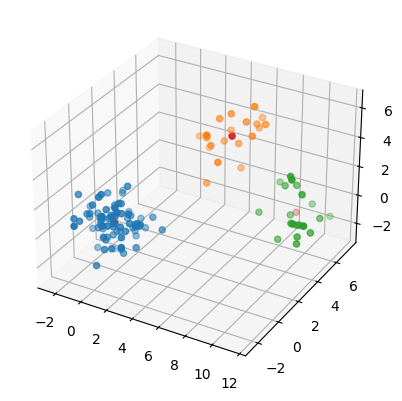

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter(points1[:,0],points1[:,1],points1[:,2])
ax.scatter(points2[:,0],points2[:,1],points2[:,2])
ax.scatter(points3[:,0],points3[:,1],points3[:,2])
centroids = np.array(centroids)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2])

plt.show()

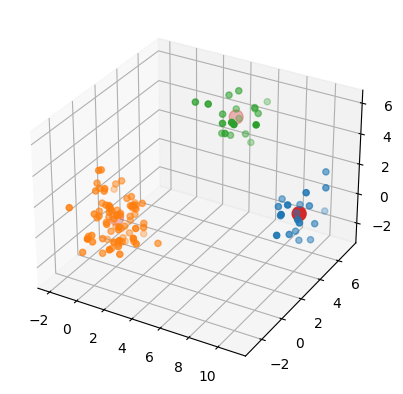

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

# 3D 서브플롯 추가
ax = fig.add_subplot(111, projection='3d')

clusters = [[] for i in range(k)]

for a,p in zip(assignments,points) :
  clusters[a].append(p)

for cluster in clusters:
  ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s = 100)
plt.show()

## Import Image

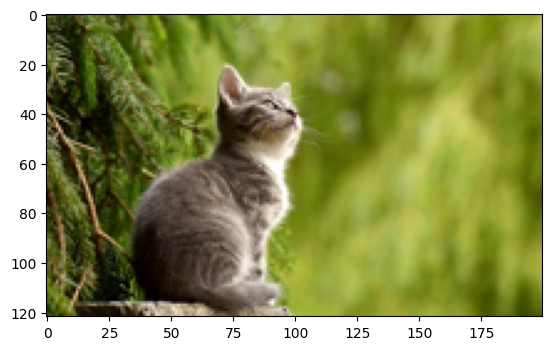

In [ ]:
from PIL import Image

im = Image.open('img.jpg')

width = 200
height = im.height * width // im.width
im = im.resize((width,height))

plt.imshow(im)
plt.show()

## Applying K-means Algorithm

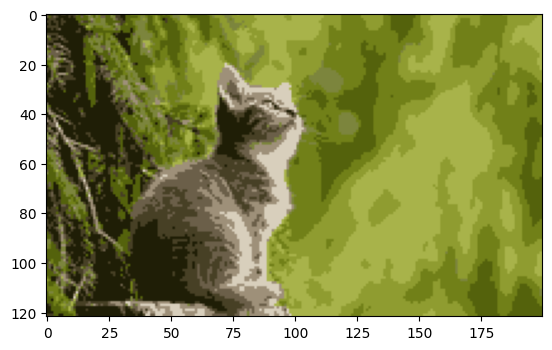

In [ ]:
pixels = np.array(im).reshape(-1,3)
assignments, centroids = kmeans(10,pixels)

for a, i in zip(assignments,range(pixels.shape[0])):
  pixels[i] = centroids[a]

new_img = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(new_img)
plt.show()

# L10. kNN

## Data import + preprocessing

In [ ]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2023-11-22 00:07:16--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-11-22 00:07:16 (511 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [ ]:
# 1.
for line in open('iris.data','r') as f:
  for line in f:
    pass

# 2.
for line in open('iris.data','r'):
  pass

# 3.
f = open('iris.data','r')
f.readline


In [ ]:
X = []
y = []

for line in open('iris.data','r'):
  line = line.strip() # 개행문자가 사라짐
  if line != '': # 맨 마지막행의 빈 데이터 삭제
    tokens = line.split(',')
    X.append([float (t) for t in tokens[:4]]) # 앞에 있는 입력 네개의 값 / 리스트 컴프리핸션
    y.append(tokens[4])
    # print(line.split(',')) # 데이터 전처리


# 형변환 필요, 개행문자('\n') 를 지우기 위해 strip 사용

# 데이터 별로 setosa .. >> 1,2,3으로 바꾸기
# 입력과 출력을 구분해서 저장해야 함. 클래스가 출력될 예정. flaot형태 데이터(input) Iris-setosa(output)

In [ ]:
X # Float들의 리스트 형태

[[5.1, 3.5, 1.4, 0.2],
 [4.9, 3.0, 1.4, 0.2],
 [4.7, 3.2, 1.3, 0.2],
 [4.6, 3.1, 1.5, 0.2],
 [5.0, 3.6, 1.4, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [4.6, 3.4, 1.4, 0.3],
 [5.0, 3.4, 1.5, 0.2],
 [4.4, 2.9, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5.4, 3.7, 1.5, 0.2],
 [4.8, 3.4, 1.6, 0.2],
 [4.8, 3.0, 1.4, 0.1],
 [4.3, 3.0, 1.1, 0.1],
 [5.8, 4.0, 1.2, 0.2],
 [5.7, 4.4, 1.5, 0.4],
 [5.4, 3.9, 1.3, 0.4],
 [5.1, 3.5, 1.4, 0.3],
 [5.7, 3.8, 1.7, 0.3],
 [5.1, 3.8, 1.5, 0.3],
 [5.4, 3.4, 1.7, 0.2],
 [5.1, 3.7, 1.5, 0.4],
 [4.6, 3.6, 1.0, 0.2],
 [5.1, 3.3, 1.7, 0.5],
 [4.8, 3.4, 1.9, 0.2],
 [5.0, 3.0, 1.6, 0.2],
 [5.0, 3.4, 1.6, 0.4],
 [5.2, 3.5, 1.5, 0.2],
 [5.2, 3.4, 1.4, 0.2],
 [4.7, 3.2, 1.6, 0.2],
 [4.8, 3.1, 1.6, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [5.2, 4.1, 1.5, 0.1],
 [5.5, 4.2, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5.0, 3.2, 1.2, 0.2],
 [5.5, 3.5, 1.3, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [4.4, 3.0, 1.3, 0.2],
 [5.1, 3.4, 1.5, 0.2],
 [5.0, 3.5, 1.3, 0.3],
 [4.5, 2.3, 1.3, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5.0, 3.5,

In [ ]:
y_labels = list(set(y)) # index 함수 사용하여 y 데이터셋 바꿔주기
print(y_labels)

['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']


In [ ]:
y_labels.index('Iris-virginica'), y_labels.index('Iris-versicolor')  # list 내의 index number 출력

(0, 2)

In [ ]:
y = [y_labels.index(i) for i in y]

In [ ]:
# sklearn에 친숙한 데이터셋 > numpy로 변환
import numpy as np

X = np.array(X)
y = np.array(y)

In [ ]:
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
import numpy as np

X = []
y = []

for line in open('iris.data', 'r'):
  line = line.strip()
  if line != '':
    tokens = line.split(',')
    X.append([float(t) for t in tokens[:4]])
    y.append(tokens[4])

### 데이터 시각화 (EDA)

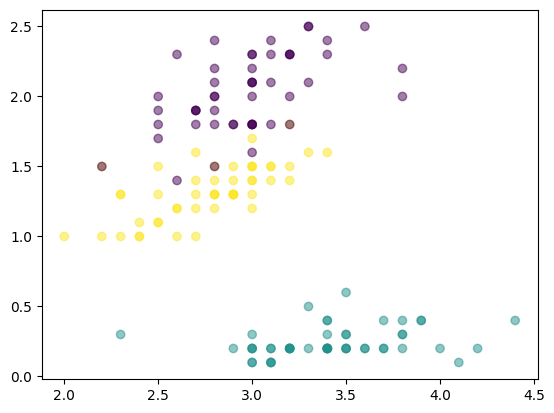

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1],X[:,3],c = y, alpha = 0.5)

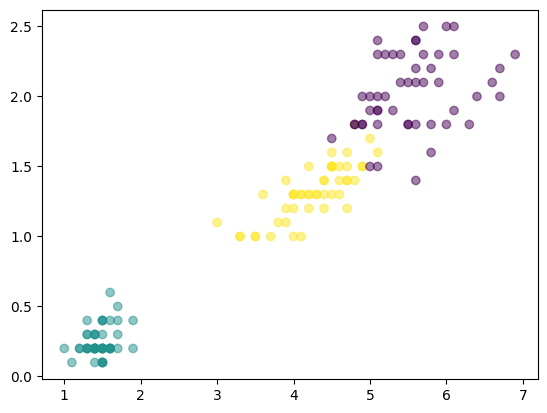

In [ ]:
plt.scatter(X[:,2],X[:,3],c = y, alpha = 0.5)

## train / data set 분리

In [ ]:
# 직접 구현
import random

tmp = list(zip(X,y))
random.shuffle(tmp)
test_tmp = tmp[:-20]

In [ ]:
# 모듈 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 41)
X_train

array([[5.7, 2.6, 3.5, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3. , 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.8, 2.7, 3.9, 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [6.2, 3

In [ ]:
X.shape, X_train.shape, X_test.shape

((150, 4), (120, 4), (30, 4))

In [ ]:
y_train, y_train.shape

(array([2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2,
        0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 2, 2, 1, 0,
        2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1,
        1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2,
        0, 2, 2, 0, 0, 1, 2, 2, 2, 0]),
 (120,))

## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 5) # 모델생성 # (n_neighbors = 5) k값 몇명의 이웃을 훑어볼 것인가!
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)

print(y_train_pred) # 예측값
print(y_train) # 실제값

print(y_train_pred == y_train) # 맞은 개수는?

[2 2 2 2 0 1 0 2 0 0 2 2 1 0 0 1 0 2 1 2 0 2 0 1 1 0 0 1 2 1 1 2 1 2 0 1 2
 2 0 1 2 2 1 0 2 1 0 0 1 2 1 1 0 0 0 1 1 1 1 1 0 0 1 0 2 1 1 0 0 0 2 2 0 1
 2 0 2 2 1 2 1 2 1 2 0 0 0 1 1 1 1 0 1 1 2 0 1 0 1 2 0 2 1 0 1 2 1 0 2 2 0
 2 2 0 0 1 2 2 2 0]
[2 2 0 2 0 1 0 2 0 2 2 2 1 0 0 1 0 2 1 2 0 2 0 1 1 0 0 1 2 1 1 2 1 2 0 1 2
 2 0 1 2 2 1 0 2 1 0 0 1 2 1 1 0 0 0 1 1 1 1 1 0 0 1 0 2 1 1 0 0 0 2 2 0 1
 2 0 2 2 1 2 1 2 1 2 0 0 0 1 1 1 1 0 1 1 2 0 1 0 1 2 0 2 1 0 1 2 1 0 2 2 0
 2 2 0 0 1 2 2 2 0]
[ True  True False  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True

In [ ]:
accuracy_score(y_train_pred, y_train)

0.9833333333333333

In [ ]:
y_test_pred = knn.predict(X_test)
accuracy_score(y_test_pred,y_test)

0.9666666666666667

cross validation   
데이터셋을 n개의 서브데이터셋으로 분할하고 각 서브데이터셋을 test 데이터셋으로 사용하여 성능 확인 , 다섯개 중 하나는 test > validation data set , 학습과 데이터 세트를 분할한다

In [ ]:
# 최적의 k 찾기

from sklearn.model_selection import cross_val_score

scores = []
k_values = range(1,31)
test_scores = []

for k in k_values : # k를 1부터 30까지 증가시켜보면서 corss validation cost가 얼마나 증가하는지, 실제 test accuracy test
  knn = KNeighborsClassifier(n_neighbors = k) # 모델
  score = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy') # cv = n fold의 n
  scores.append(score.mean())

  knn.fit(X_train,y_train)
  y_test_pred = knn.predict(X_test)
  test_scores.append(accuracy_score(y_test_pred, y_test)) # test set accuracy


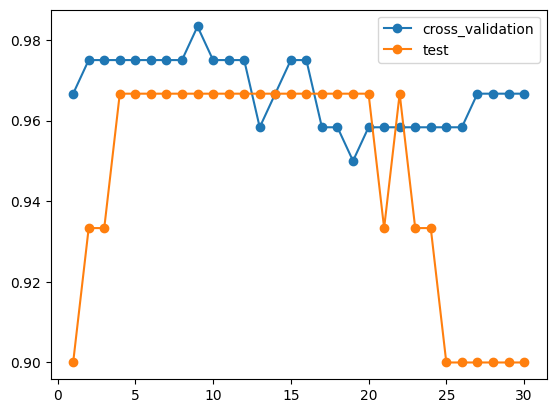

In [ ]:
plt.plot(k_values, scores,'-o', label = 'cross_validation') # 9일 때 가장 높은 점수
plt.plot(k_values, test_scores, '-o', label = 'test')
plt.legend()

plt.show()